In [1]:
import pandas as pd

file_path = "Final_Normative_Athlete_Data.csv"
df = pd.read_csv(file_path)

In [2]:
df

,Previous Concussions (1-3),Depression Diagnosis,PCSS Mild-Severe,MFQ Depression,Headache,Dizziness,Mental Fog,Sadness,Soccer,Hockey,Rugby,Football,Lacrosse,Cheerleading
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,0,0,0,0,0,1,0,0,1,0,0,0,0
144,0,1,1,0,1,0,0,0,1,0,0,0,0,0
145,1,1,0,0,0,0,0,0,0,0,0,0,1,0
146,1,1,0,0,0,0,0,0,0,0,0,0,1,0


<Figure size 600x400 with 0 Axes>

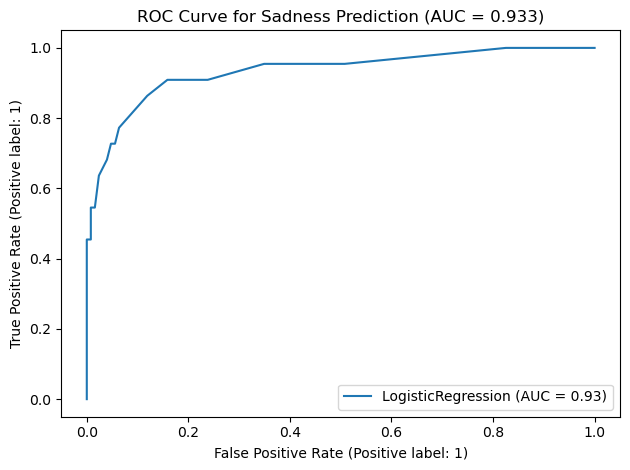

<Figure size 600x400 with 0 Axes>

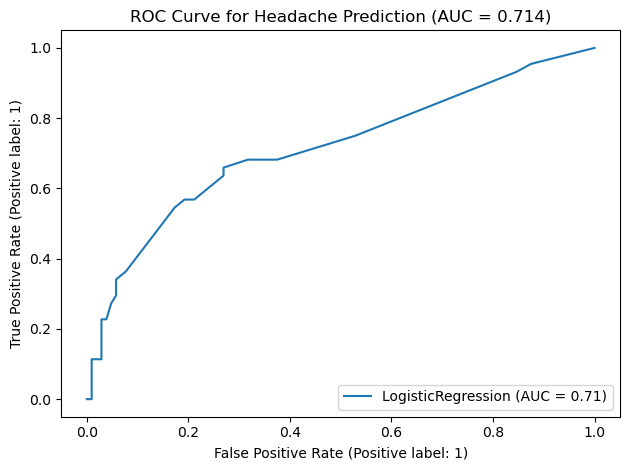

In [5]:
# Run baseline logistic regression models for predicting 'Sadness' and 'Headache'
# without CV, tuning

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# Clean column names for easier handling
df.columns = df.columns.str.strip()

# Define predictors (excluding Dizziness and Mental Fog)
predictors = [
    'Previous Concussions (1-3)', 'Depression Diagnosis',
    'PCSS Mild-Severe', 'MFQ Depression',
    'Soccer', 'Hockey', 'Rugby', 'Football', 'Lacrosse', 'Cheerleading'
]

# 1️⃣ Baseline logistic regression for predicting 'Sadness'
X_sadness = df[predictors]
y_sadness = df['Sadness']

lr_sadness = LogisticRegression(max_iter=500)
lr_sadness.fit(X_sadness, y_sadness)
y_pred_sadness = lr_sadness.predict(X_sadness)
y_prob_sadness = lr_sadness.predict_proba(X_sadness)[:, 1]
roc_auc_sadness = roc_auc_score(y_sadness, y_prob_sadness)

# 2️⃣ Baseline logistic regression for predicting 'Headache'
X_headache = df[predictors]
y_headache = df['Headache']

lr_headache = LogisticRegression(max_iter=500)
lr_headache.fit(X_headache, y_headache)
y_pred_headache = lr_headache.predict(X_headache)
y_prob_headache = lr_headache.predict_proba(X_headache)[:, 1]
roc_auc_headache = roc_auc_score(y_headache, y_prob_headache)

# Generate classification reports and confusion matrices
report_sadness = classification_report(y_sadness, y_pred_sadness, output_dict=True)
report_headache = classification_report(y_headache, y_pred_headache, output_dict=True)

conf_matrix_sadness = confusion_matrix(y_sadness, y_pred_sadness)
conf_matrix_headache = confusion_matrix(y_headache, y_pred_headache)

# Visualize ROC curves for both models
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(lr_sadness, X_sadness, y_sadness)
plt.title(f'ROC Curve for Sadness Prediction (AUC = {roc_auc_sadness:.3f})')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(lr_headache, X_headache, y_headache)
plt.title(f'ROC Curve for Headache Prediction (AUC = {roc_auc_headache:.3f})')
plt.tight_layout()
plt.show()

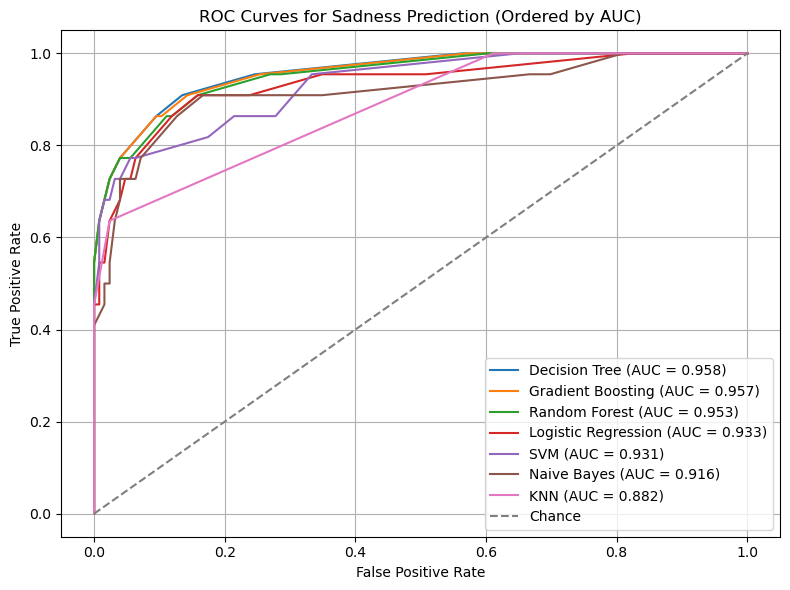

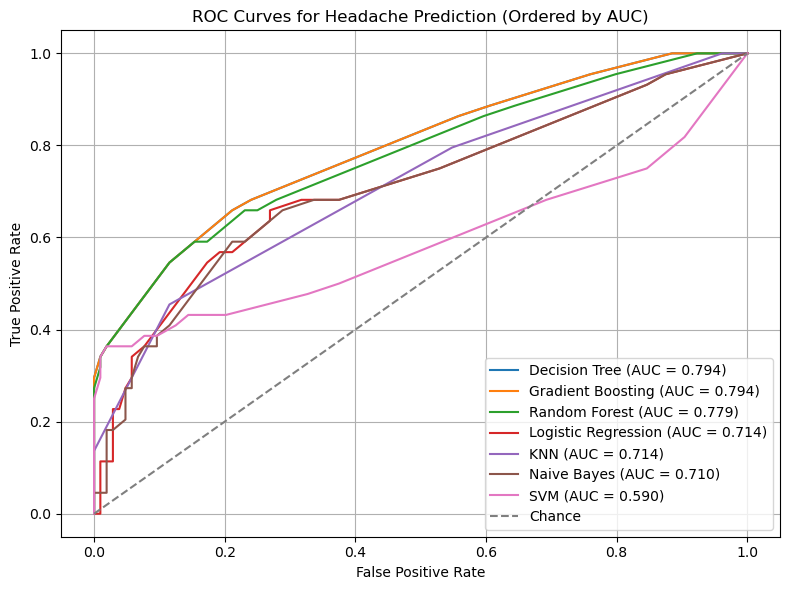

In [7]:
# Comprehensive clean modeling:
# - Logistic Regression, Random Forest, Gradient Boosting, SVM, Naive Bayes, KNN, Decision Tree
# - For 'Sadness' and 'Headache'
# - Display ROC curves ordered highest to lowest AUC for each target

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Model initialization with standard settings (baseline, no tuning)
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Function to fit models, compute ROC data, and collect AUCs
def evaluate_models(X, y, label):
    results = []
    for name, model in models.items():
        model.fit(X, y)
        y_prob = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_prob)
        auc_score = auc(fpr, tpr)
        results.append({
            "name": name,
            "fpr": fpr,
            "tpr": tpr,
            "auc": auc_score
        })
    # Sort by AUC descending for clean visual ordering
    results.sort(key=lambda x: x["auc"], reverse=True)
    
    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for res in results:
        plt.plot(res["fpr"], res["tpr"], label=f'{res["name"]} (AUC = {res["auc"]:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {label} Prediction (Ordered by AUC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Return results for documentation if needed
    return results

# Execute for 'Sadness' (excluding dizziness and mental fog)
results_sadness = evaluate_models(X_sadness, y_sadness, 'Sadness')

# Execute for 'Headache' (excluding dizziness and mental fog)
results_headache = evaluate_models(X_headache, y_headache, 'Headache')

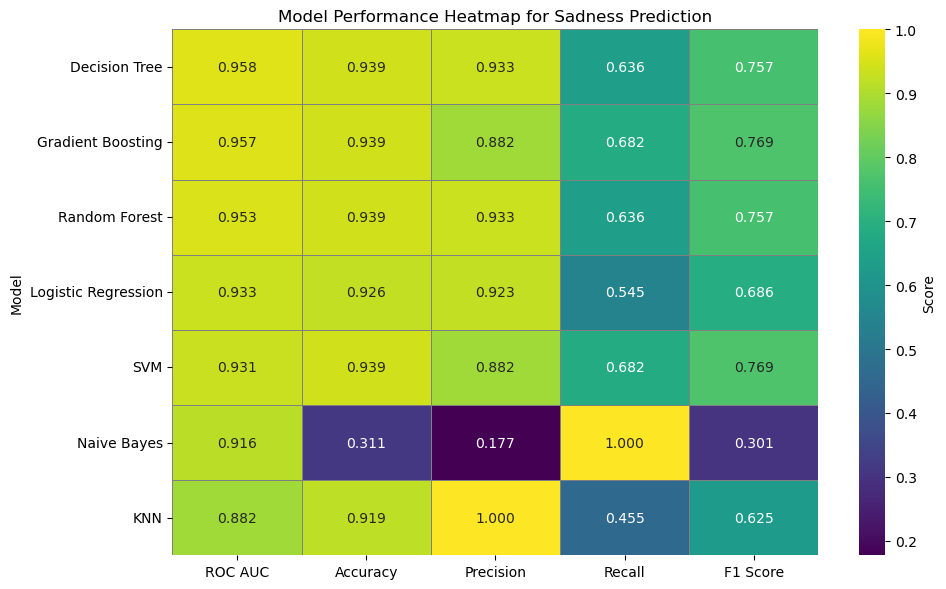

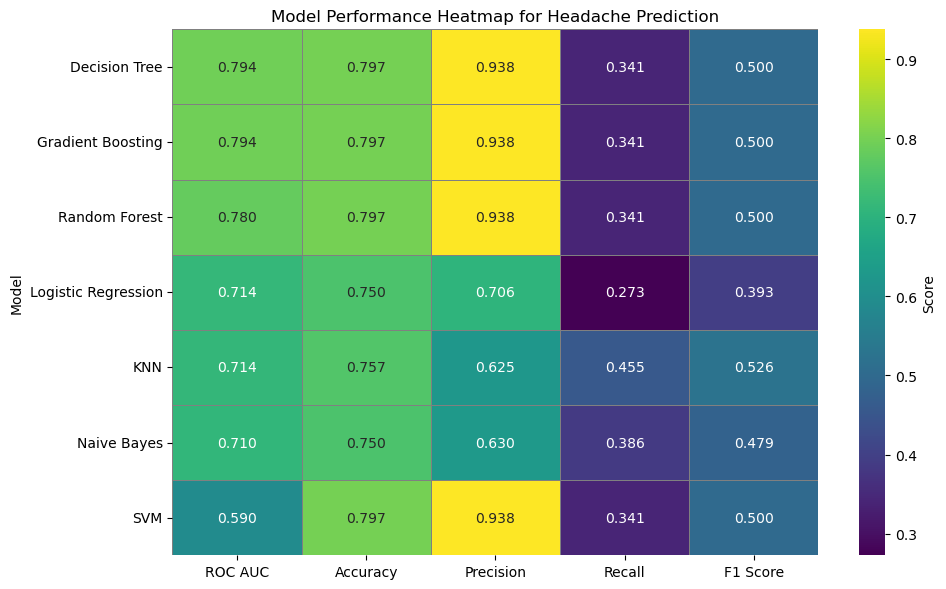

In [11]:
# Generate visualizations for accuracy, precision, recall, F1, and ROC AUC
# for all models for both 'Sadness' and 'Headache' 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np

# Function to compute and collect metrics
def collect_metrics(X, y, label):
    metrics_data = []
    for name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        y_prob = model.predict_proba(X)[:, 1]
        auc_val = roc_auc_score(y, y_prob)
        acc_val = accuracy_score(y, y_pred)
        prec_val = precision_score(y, y_pred, zero_division=0)
        rec_val = recall_score(y, y_pred, zero_division=0)
        f1_val = f1_score(y, y_pred, zero_division=0)

        metrics_data.append({
            "Model": name,
            "ROC AUC": auc_val,
            "Accuracy": acc_val,
            "Precision": prec_val,
            "Recall": rec_val,
            "F1 Score": f1_val
        })
    # Create DataFrame and sort by ROC AUC descending
    df_metrics = pd.DataFrame(metrics_data)
    df_metrics = df_metrics.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
    return df_metrics

# Collect metrics for Sadness
df_metrics_sadness = collect_metrics(X_sadness, y_sadness, "Sadness")

# Collect metrics for Headache
df_metrics_headache = collect_metrics(X_headache, y_headache, "Headache")

import seaborn as sns

# Function to plot heatmap for model metrics
def plot_heatmap(df_metrics, label):
    plt.figure(figsize=(10, 6))
    # Reshape for heatmap
    df_heatmap = df_metrics.set_index("Model")[["ROC AUC", "Accuracy", "Precision", "Recall", "F1 Score"]]
    sns.heatmap(df_heatmap,
                annot=True,
                fmt=".3f",
                cmap="viridis",
                cbar_kws={"label": "Score"},
                linewidths=0.5,
                linecolor='gray')
    plt.title(f"Model Performance Heatmap for {label} Prediction")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
# Heatmap for Sadness
plot_heatmap(df_metrics_sadness, "Sadness")

# Heatmap for Headache
plot_heatmap(df_metrics_headache, "Headache")

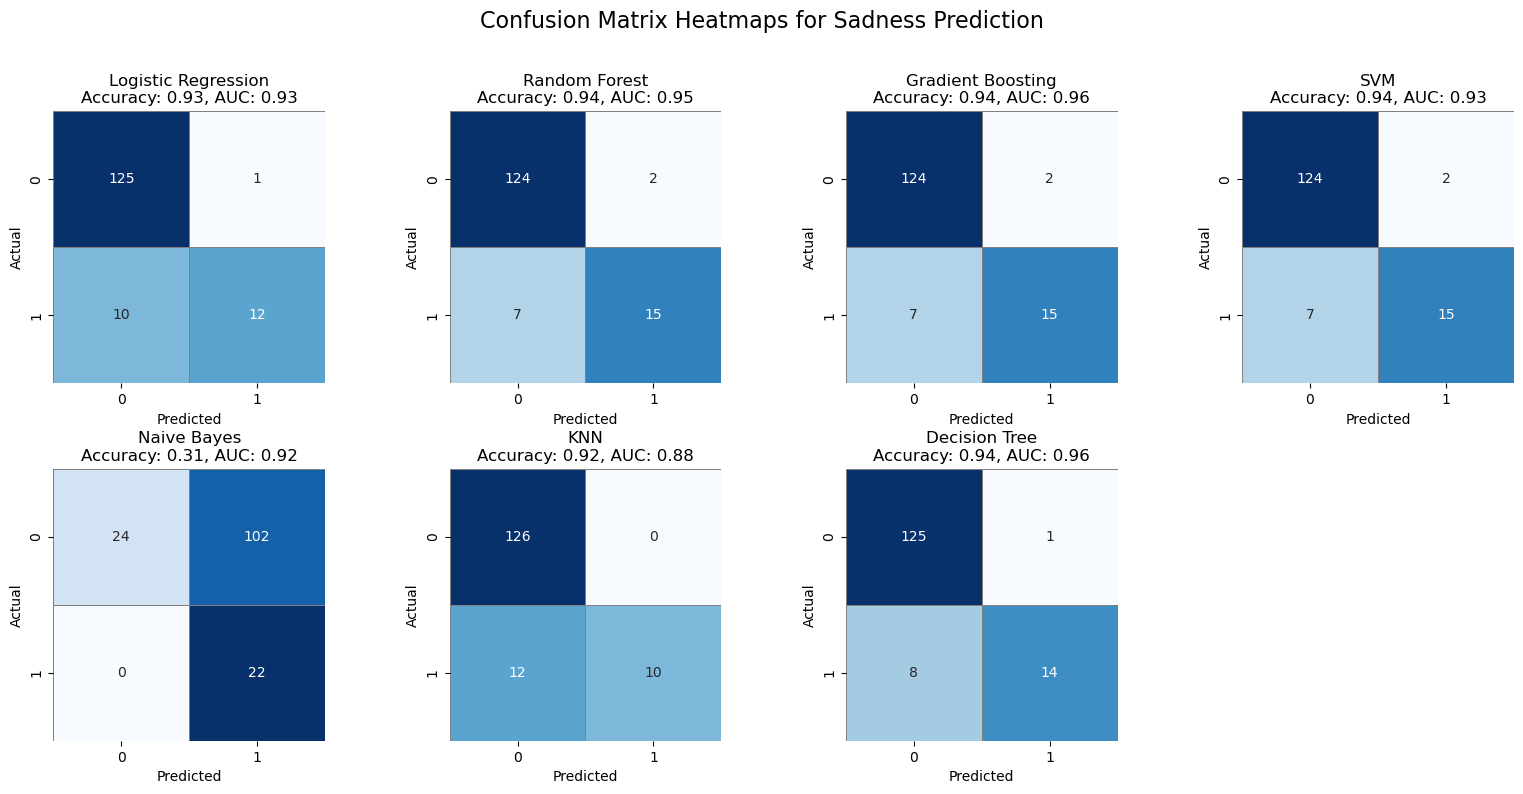

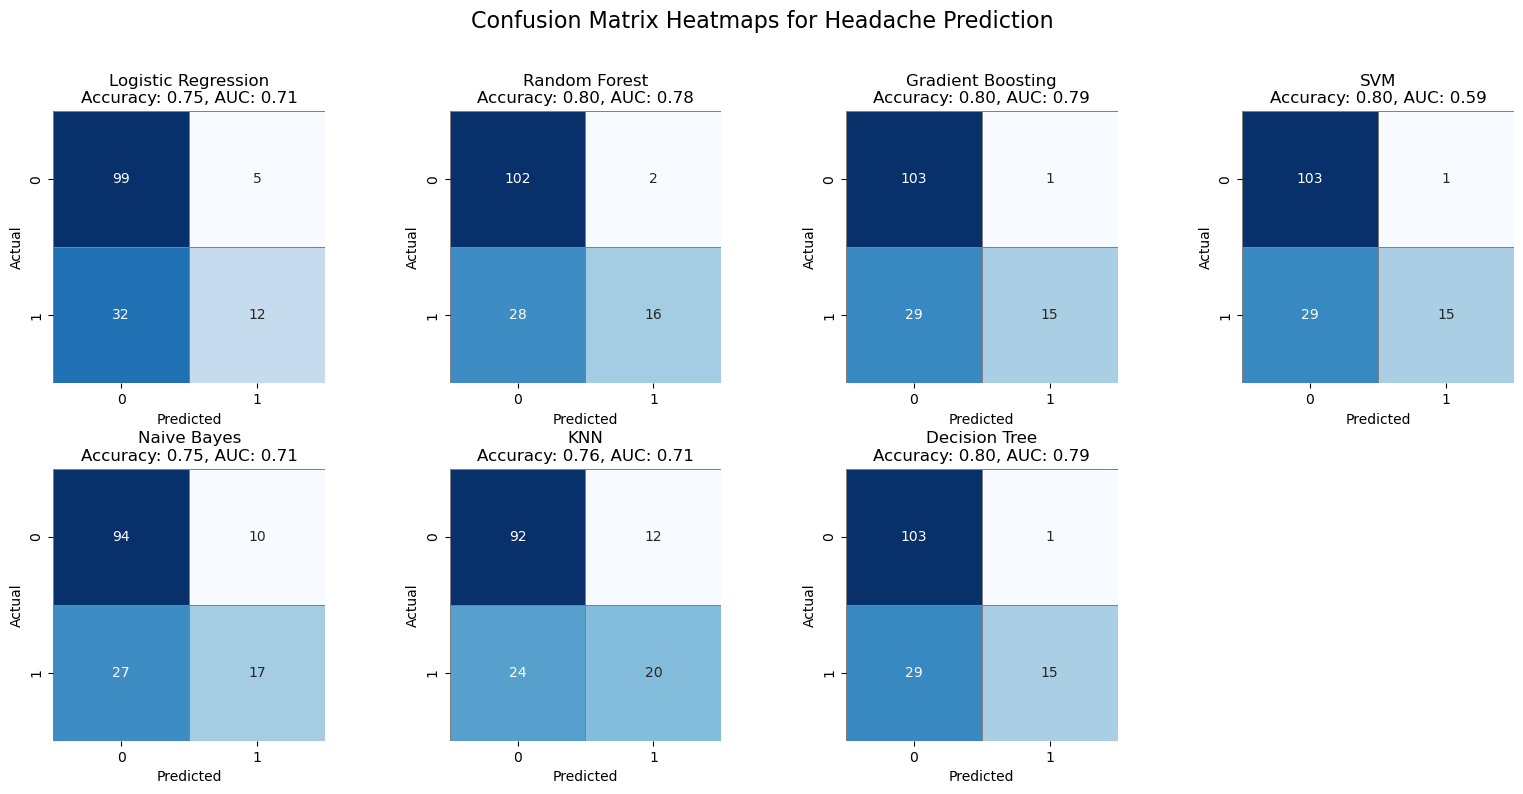

In [12]:
# Generate clean side-by-side confusion matrix heatmaps for all models
# for both 'Sadness' and 'Headache' for structured comparison

from sklearn.metrics import confusion_matrix

# Helper function to plot confusion matrices for all models in a grid
def plot_confusion_matrices(X, y, label):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for idx, (name, model) in enumerate(models.items()):
        if idx >= len(axes):
            break  # Prevent overflow if fewer models

        model.fit(X, y)
        y_pred = model.predict(X)
        cm = confusion_matrix(y, y_pred)
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalized for clearer comparison

        sns.heatmap(cm_norm,
                    annot=cm,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[idx],
                    square=True,
                    linewidths=0.5,
                    linecolor='gray')

        acc = accuracy_score(y, y_pred)
        auc_val = roc_auc_score(y, model.predict_proba(X)[:, 1])

        axes[idx].set_title(f"{name}\nAccuracy: {acc:.2f}, AUC: {auc_val:.2f}")
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    # Hide unused subplots if fewer models
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"Confusion Matrix Heatmaps for {label} Prediction", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Generate confusion matrices for Sadness
plot_confusion_matrices(X_sadness, y_sadness, "Sadness")

# Generate confusion matrices for Headache
plot_confusion_matrices(X_headache, y_headache, "Headache")

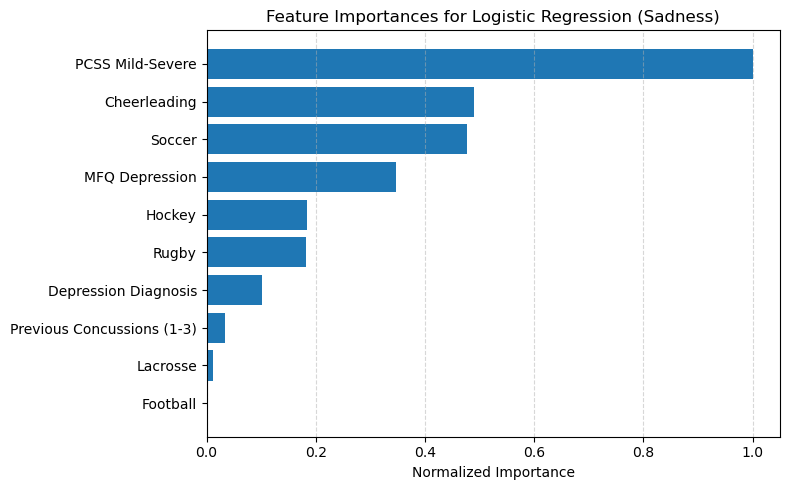

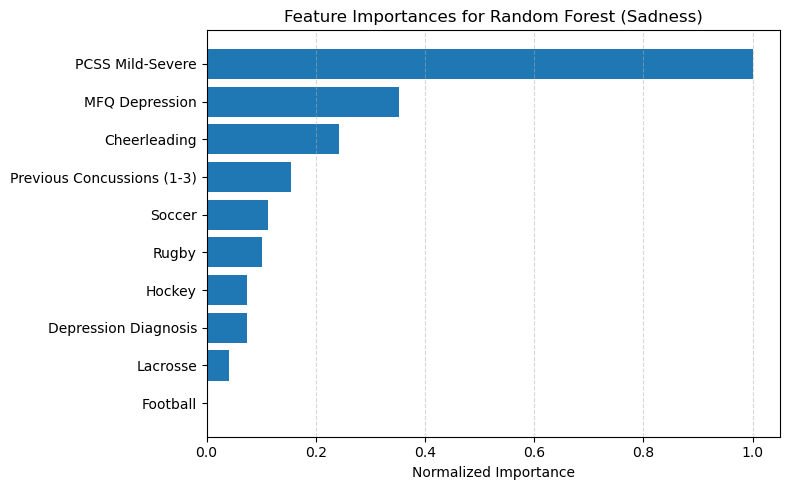

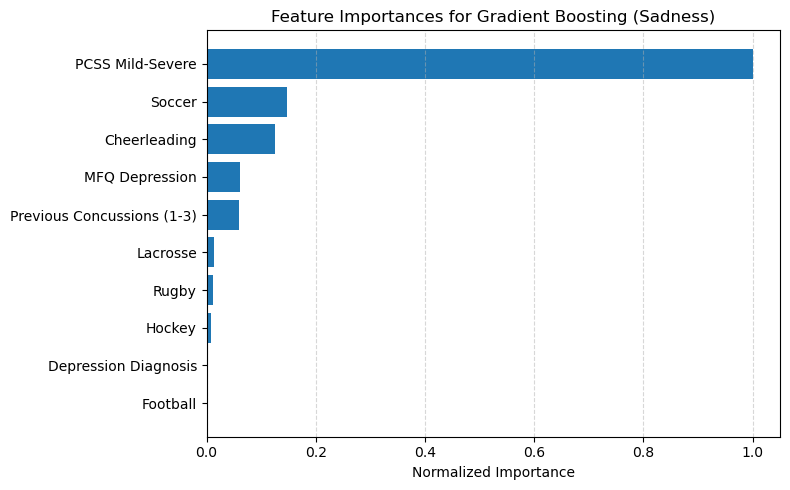

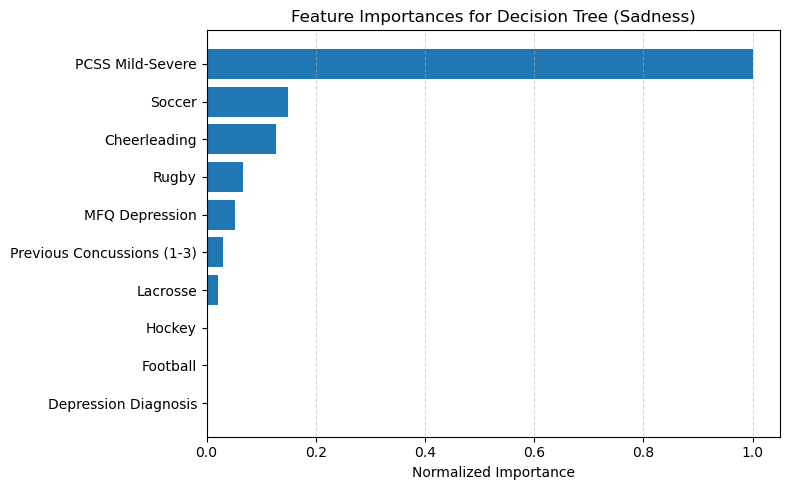

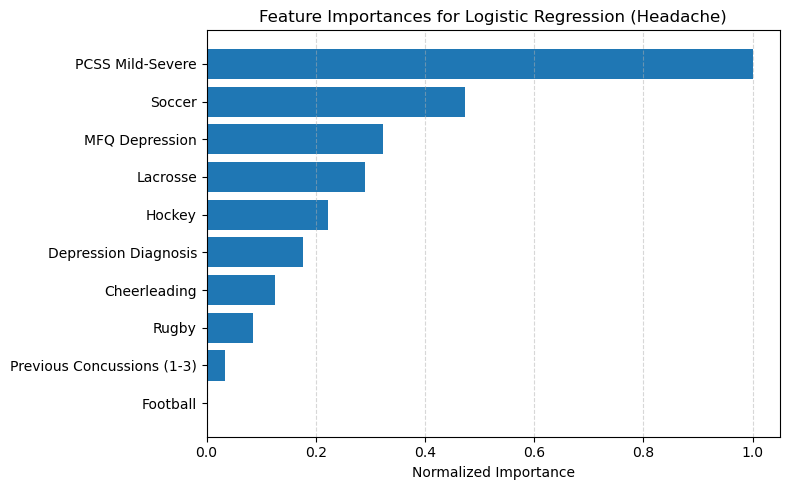

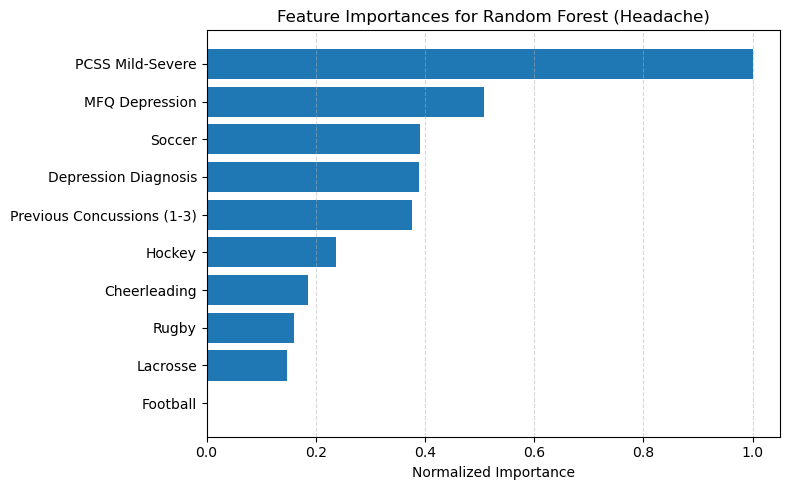

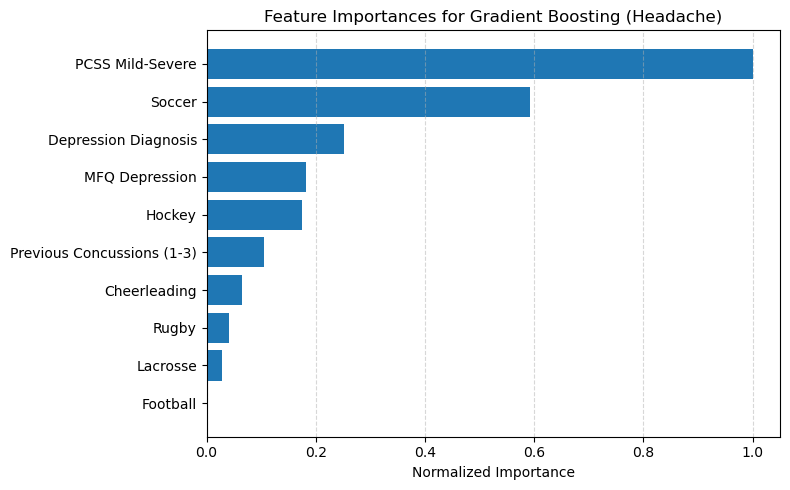

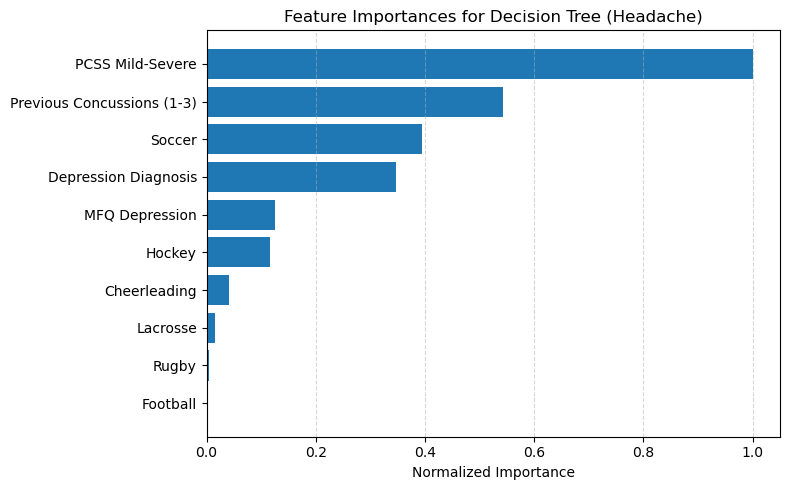

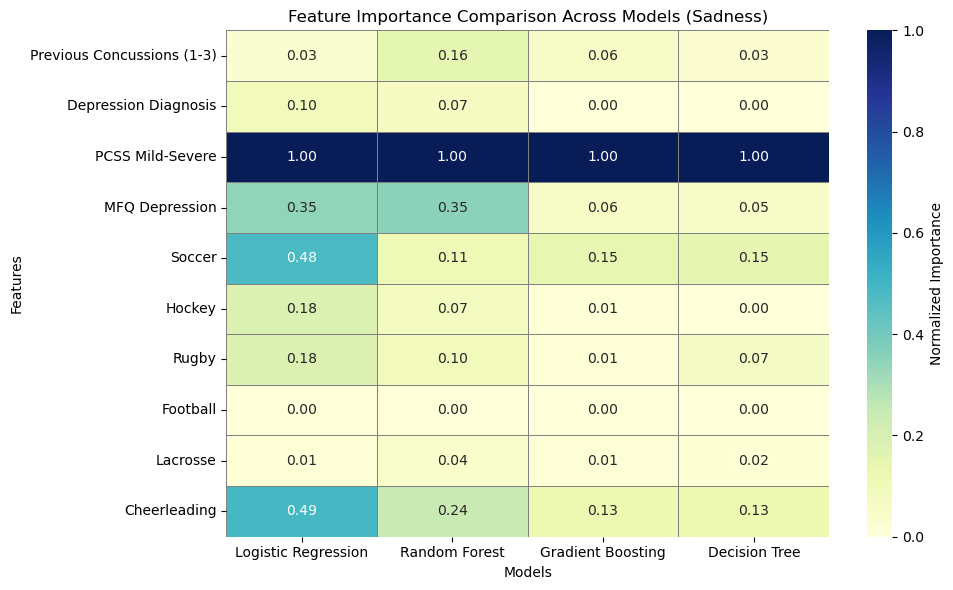

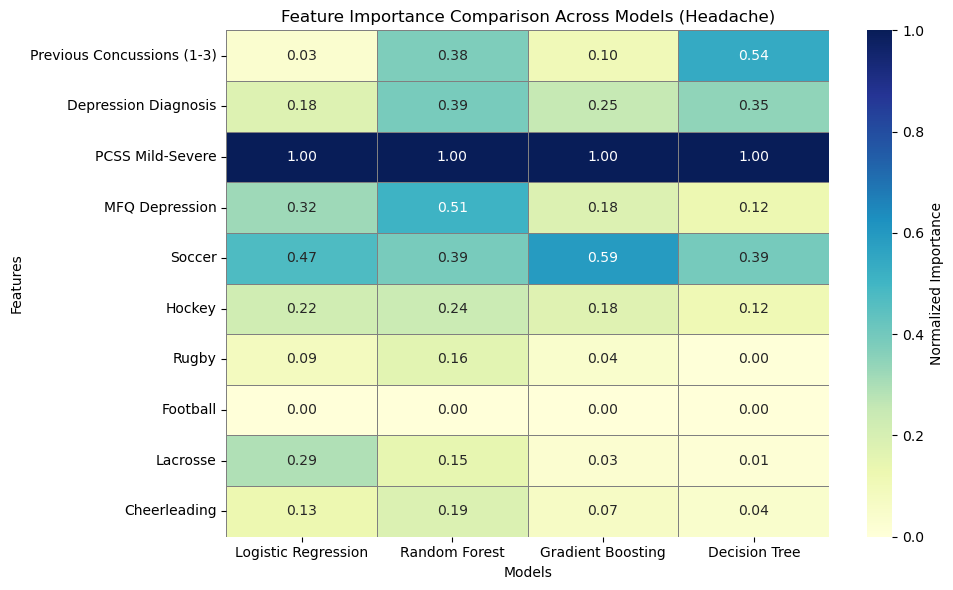

In [13]:
# Generate clean, comparative feature importance visualizations:
# - Horizontal bar plots per model
# - Combined heatmap across models
# - For both 'Sadness' and 'Headache'

# Import SHAPELY for structured handling if needed
from sklearn.preprocessing import MinMaxScaler

# Function to extract feature importances in a comparable, normalized way
def get_feature_importances(models_dict, X, y):
    importance_dict = {}
    for name, model in models_dict.items():
        model.fit(X, y)
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
        elif hasattr(model, "coef_"):
            importances = np.abs(model.coef_).flatten()
        else:
            continue  # skip models without direct importance

        scaler = MinMaxScaler()
        importances_scaled = scaler.fit_transform(importances.reshape(-1, 1)).flatten()
        importance_dict[name] = importances_scaled
    return pd.DataFrame(importance_dict, index=X.columns)

# Models supporting direct feature importance extraction
models_for_importance = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# 1️⃣ Sadness: extract feature importances
importance_df_sadness = get_feature_importances(models_for_importance, X_sadness, y_sadness)

# 2️⃣ Headache: extract feature importances
importance_df_headache = get_feature_importances(models_for_importance, X_headache, y_headache)

# Plotting horizontal bar plots for each model
def plot_feature_importance_bars(importance_df, label):
    for model in importance_df.columns:
        importances = importance_df[model].sort_values(ascending=True)
        plt.figure(figsize=(8, 5))
        plt.barh(importances.index, importances.values)
        plt.xlabel("Normalized Importance")
        plt.title(f"Feature Importances for {model} ({label})")
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Plot bar plots for Sadness
plot_feature_importance_bars(importance_df_sadness, "Sadness")

# Plot bar plots for Headache
plot_feature_importance_bars(importance_df_headache, "Headache")

# Plotting combined heatmap for clear cross-model comparison
def plot_feature_importance_heatmap(importance_df, label):
    plt.figure(figsize=(10, 6))
    sns.heatmap(importance_df,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar_kws={'label': 'Normalized Importance'},
                linewidths=0.5,
                linecolor='gray')
    plt.title(f"Feature Importance Comparison Across Models ({label})")
    plt.ylabel("Features")
    plt.xlabel("Models")
    plt.tight_layout()
    plt.show()

# Heatmap for Sadness
plot_feature_importance_heatmap(importance_df_sadness, "Sadness")

# Heatmap for Headache
plot_feature_importance_heatmap(importance_df_headache, "Headache")

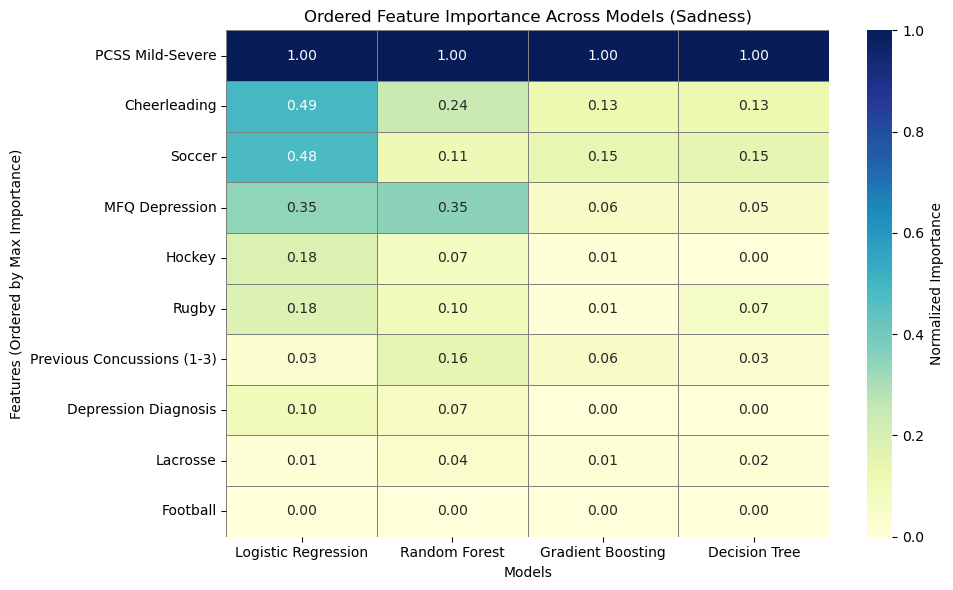

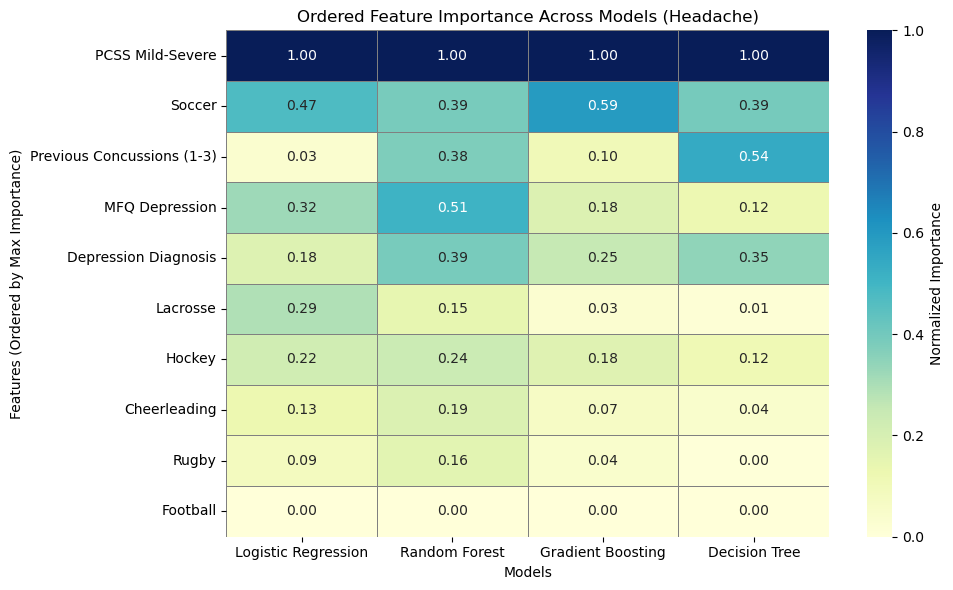

In [14]:
# Reorder heatmaps in descending order of maximum normalized importance across models for clarity

def plot_ordered_feature_importance_heatmap(importance_df, label):
    # Reorder based on the maximum importance across all models
    importance_df_ordered = importance_df.loc[
        importance_df.max(axis=1).sort_values(ascending=False).index
    ]
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(importance_df_ordered,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar_kws={'label': 'Normalized Importance'},
                linewidths=0.5,
                linecolor='gray')
    plt.title(f"Ordered Feature Importance Across Models ({label})")
    plt.ylabel("Features (Ordered by Max Importance)")
    plt.xlabel("Models")
    plt.tight_layout()
    plt.show()

# Reordered heatmap for Sadness
plot_ordered_feature_importance_heatmap(importance_df_sadness, "Sadness")

# Reordered heatmap for Headache
plot_ordered_feature_importance_heatmap(importance_df_headache, "Headache")

In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Load data
df.columns = df.columns.str.strip()

# Define predictors
predictors = [
    'Previous Concussions (1-3)', 'Depression Diagnosis',
    'PCSS Mild-Severe', 'MFQ Depression',
    'Soccer', 'Hockey', 'Rugby', 'Football', 'Lacrosse', 'Cheerleading'
]

# Define targets
targets = {"Sadness": "Sadness", "Headache": "Headache"}

# Define models and minimal parameter grids
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=500, solver='lbfgs'),
        {"C": [0.1, 1, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {"n_estimators": [100, 300], "max_depth": [None, 5]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {"learning_rate": [0.05, 0.1], "n_estimators": [100, 300]}
    ),
    "SVM": (
        SVC(probability=True),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}  # No tuning needed, will fit directly
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"max_depth": [None, 5, 10]}
    )
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Run tuning for each target
for label, target_col in targets.items():
    X = df[predictors]
    y = df[target_col]
    
    print(f"\n=== {label} Prediction ===\n")
    
    for model_name, (model, param_grid) in models.items():
        print(f"Tuning {model_name}...")
        
        if param_grid:  # If hyperparameters are defined
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grid,
                n_iter=min(3, np.prod([len(v) for v in param_grid.values()])),  # 3 iterations max for speed
                scoring='roc_auc',
                cv=cv_strategy,
                n_jobs=-1,
                random_state=42,
                verbose=0
            )
            random_search.fit(X, y)
            best_model = random_search.best_estimator_
            best_params = random_search.best_params_
        else:
            # Fit directly for Naive Bayes
            model.fit(X, y)
            best_model = model
            best_params = "Default (no tuning)"
        
        y_pred = best_model.predict(X)
        y_prob = best_model.predict_proba(X)[:, 1]
        
        roc_auc = roc_auc_score(y, y_prob)
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred, zero_division=0)
        rec = recall_score(y, y_pred, zero_division=0)
        f1 = f1_score(y, y_pred, zero_division=0)
        
        print(f"Best Parameters: {best_params}")
        print(f"ROC AUC: {roc_auc:.3f}")
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision: {prec:.3f}")
        print(f"Recall: {rec:.3f}")
        print(f"F1 Score: {f1:.3f}\n")



=== Sadness Prediction ===

Tuning Logistic Regression...
Best Parameters: {'C': 1}
ROC AUC: 0.933
Accuracy: 0.926
Precision: 0.923
Recall: 0.545
F1 Score: 0.686

Tuning Random Forest...
Best Parameters: {'n_estimators': 100, 'max_depth': None}
ROC AUC: 0.954
Accuracy: 0.939
Precision: 0.933
Recall: 0.636
F1 Score: 0.757

Tuning Gradient Boosting...
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.05}
ROC AUC: 0.952
Accuracy: 0.939
Precision: 0.882
Recall: 0.682
F1 Score: 0.769

Tuning SVM...
Best Parameters: {'kernel': 'linear', 'C': 0.1}
ROC AUC: 0.909
Accuracy: 0.912
Precision: 0.846
Recall: 0.500
F1 Score: 0.629

Tuning Naive Bayes...
Best Parameters: Default (no tuning)
ROC AUC: 0.916
Accuracy: 0.311
Precision: 0.177
Recall: 1.000
F1 Score: 0.301

Tuning KNN...
Best Parameters: {'n_neighbors': 7}
ROC AUC: 0.906
Accuracy: 0.905
Precision: 1.000
Recall: 0.364
F1 Score: 0.533

Tuning Decision Tree...
Best Parameters: {'max_depth': 10}
ROC AUC: 0.958
Accuracy: 0.939
Precisio

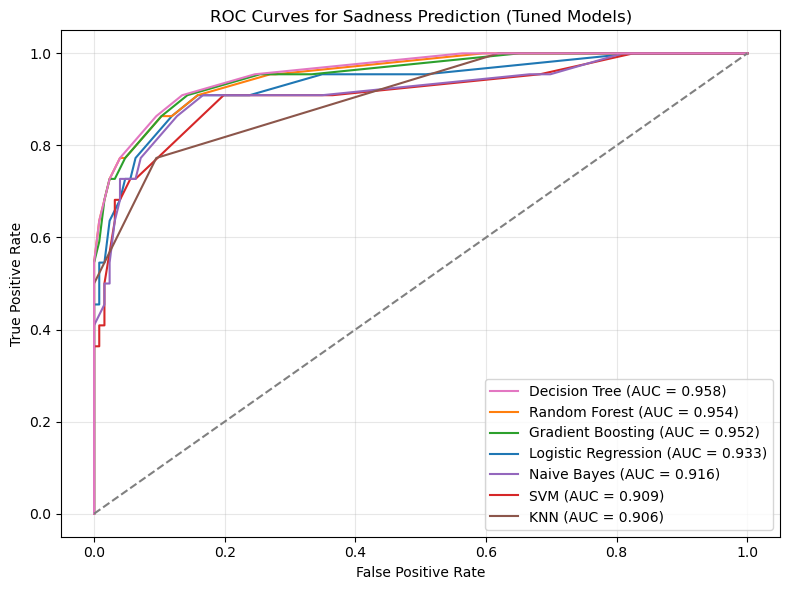

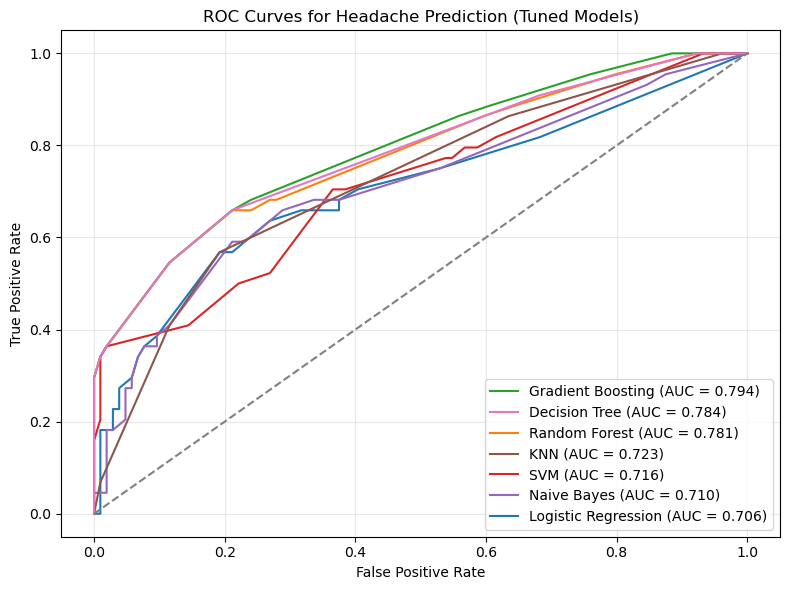

In [21]:
# Re-run ROC AUC visualization for all tuned models for Sadness and Headache

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

df.columns = df.columns.str.strip()

# Define predictors
predictors = [
    'Previous Concussions (1-3)', 'Depression Diagnosis',
    'PCSS Mild-Severe', 'MFQ Depression',
    'Soccer', 'Hockey', 'Rugby', 'Football', 'Lacrosse', 'Cheerleading'
]

# Mapping best parameters
best_params_dict = {
    "Sadness": {
        "Logistic Regression": {'C': 1},
        "Random Forest": {'n_estimators': 100, 'max_depth': None},
        "Gradient Boosting": {'n_estimators': 100, 'learning_rate': 0.05},
        "SVM": {'kernel': 'linear', 'C': 0.1},
        "Naive Bayes": {},
        "KNN": {'n_neighbors': 7},
        "Decision Tree": {'max_depth': 10}
    },
    "Headache": {
        "Logistic Regression": {'C': 0.1},
        "Random Forest": {'n_estimators': 300, 'max_depth': None},
        "Gradient Boosting": {'n_estimators': 300, 'learning_rate': 0.05},
        "SVM": {'kernel': 'rbf', 'C': 10},
        "Naive Bayes": {},
        "KNN": {'n_neighbors': 7},
        "Decision Tree": {'max_depth': 5}
    }
}

# Function for clean instantiation
def get_model_instance(name, params):
    if name == "Logistic Regression":
        return LogisticRegression(max_iter=500, solver='lbfgs', **params)
    elif name == "Random Forest":
        return RandomForestClassifier(**params)
    elif name == "Gradient Boosting":
        return GradientBoostingClassifier(**params)
    elif name == "SVM":
        return SVC(probability=True, **params)
    elif name == "Naive Bayes":
        return GaussianNB(**params)
    elif name == "KNN":
        return KNeighborsClassifier(**params)
    elif name == "Decision Tree":
        return DecisionTreeClassifier(**params)

# Visualization function for ROC
def plot_roc_curves(target_label, target_column):
    X = df[predictors]
    y = df[target_column]
    
    plt.figure(figsize=(8, 6))
    auc_scores = []

    for model_name, params in best_params_dict[target_label].items():
        model = get_model_instance(model_name, params)
        model.fit(X, y)
        y_prob = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_prob)
        roc_auc = auc(fpr, tpr)
        auc_scores.append((model_name, roc_auc))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

    # Sort legend by AUC descending
    auc_scores.sort(key=lambda x: x[1], reverse=True)
    handles, labels = plt.gca().get_legend_handles_labels()
    ordered_handles_labels = sorted(zip(handles, labels), key=lambda x: float(x[1].split('=')[-1][:-1]), reverse=True)
    ordered_handles, ordered_labels = zip(*ordered_handles_labels)
    plt.legend(ordered_handles, ordered_labels, loc='lower right')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curves for {target_label} Prediction (Tuned Models)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Generate ROC for Sadness
plot_roc_curves("Sadness", "Sadness")

# Generate ROC for Headache
plot_roc_curves("Headache", "Headache")

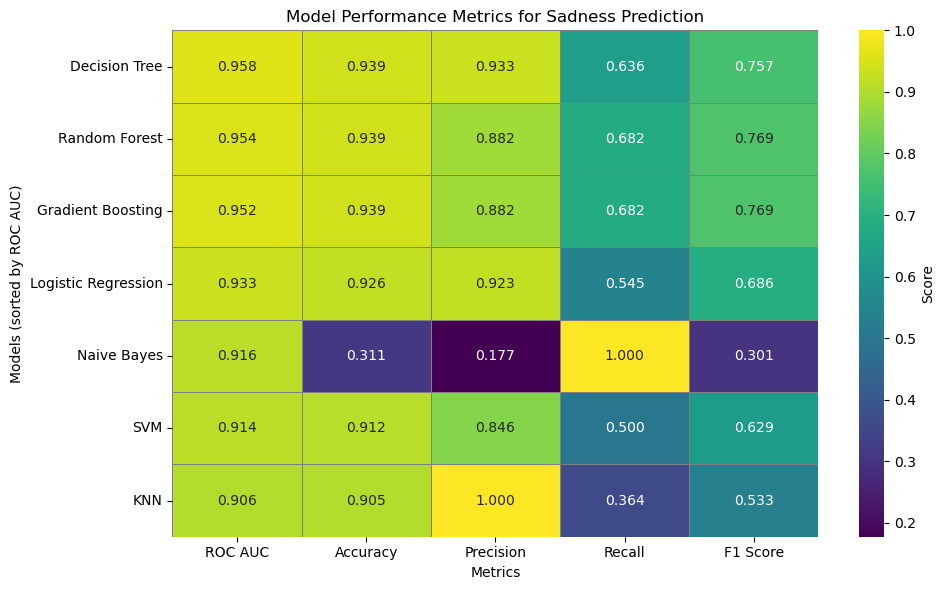

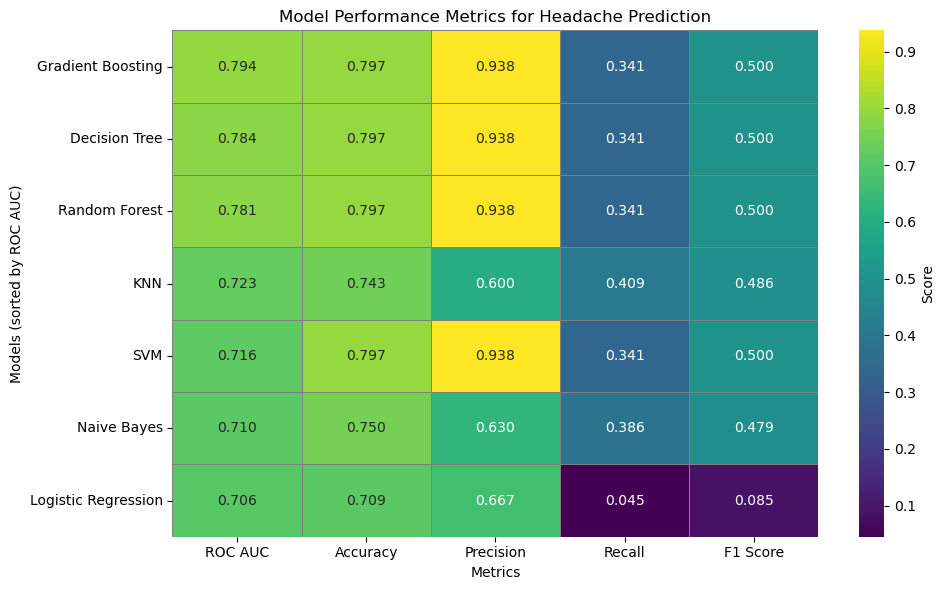

In [27]:
# Generate clean heatmaps for ROC AUC, accuracy, precision, recall, and F1 score
# for all tuned models for both Sadness and Headache

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Collect metrics for all models for a specified target
def collect_model_metrics(target_label, target_column):
    X = df[predictors]
    y = df[target_column]
    
    metrics_list = []
    for model_name, params in best_params_dict[target_label].items():
        model = get_model_instance(model_name, params)
        model.fit(X, y)
        y_pred = model.predict(X)
        y_prob = model.predict_proba(X)[:, 1]

        roc_auc = roc_auc_score(y, y_prob)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, zero_division=0)
        recall = recall_score(y, y_pred, zero_division=0)
        f1 = f1_score(y, y_pred, zero_division=0)

        metrics_list.append({
            "Model": model_name,
            "ROC AUC": roc_auc,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

    metrics_df = pd.DataFrame(metrics_list)
    metrics_df = metrics_df.set_index("Model").sort_values(by="ROC AUC", ascending=False)
    return metrics_df

# Collect metrics for Sadness
metrics_sadness_df = collect_model_metrics("Sadness", "Sadness")

# Collect metrics for Headache
metrics_headache_df = collect_model_metrics("Headache", "Headache")

# Plot heatmap function
def plot_metrics_heatmap(metrics_df, label):
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df,
                annot=True,
                fmt=".3f",
                cmap="viridis",
                cbar_kws={"label": "Score"},
                linewidths=0.5,
                linecolor='gray')
    plt.title(f"Model Performance Metrics for {label} Prediction")
    plt.ylabel("Models (sorted by ROC AUC)")
    plt.xlabel("Metrics")
    plt.tight_layout()
    plt.show()

# Plot heatmap for Sadness
plot_metrics_heatmap(metrics_sadness_df, "Sadness")

# Plot heatmap for Headache
plot_metrics_heatmap(metrics_headache_df, "Headache")

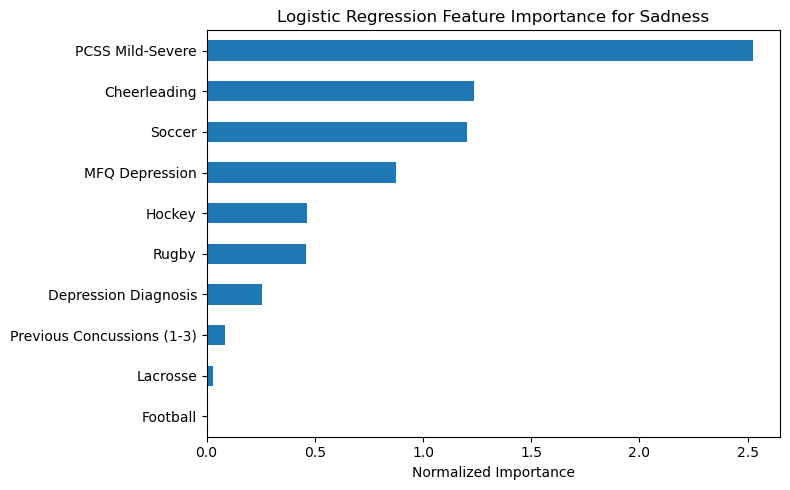

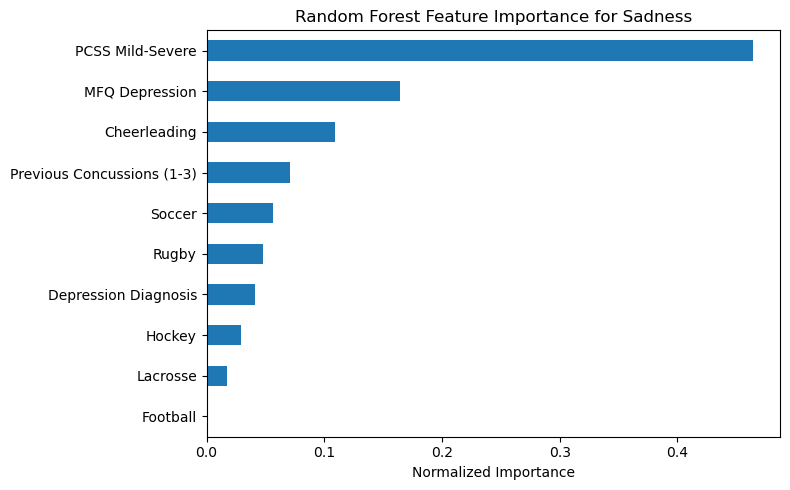

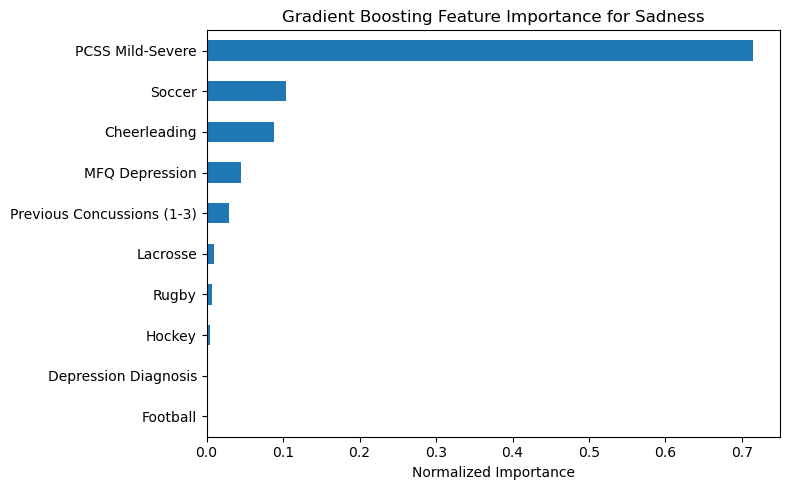

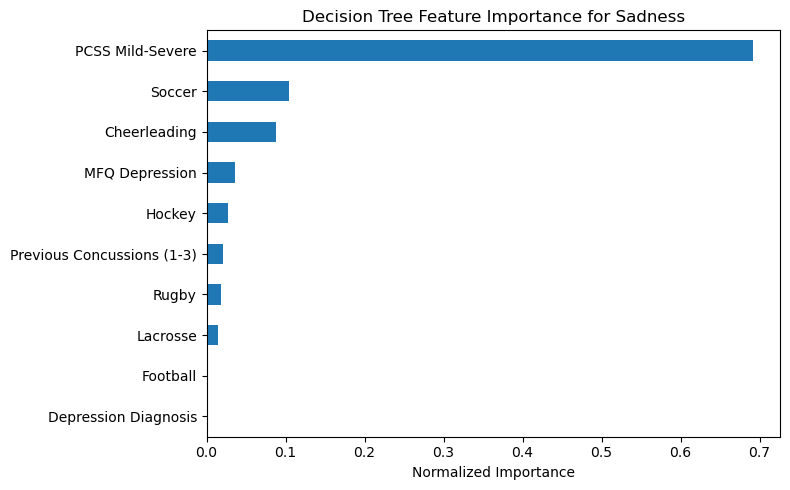

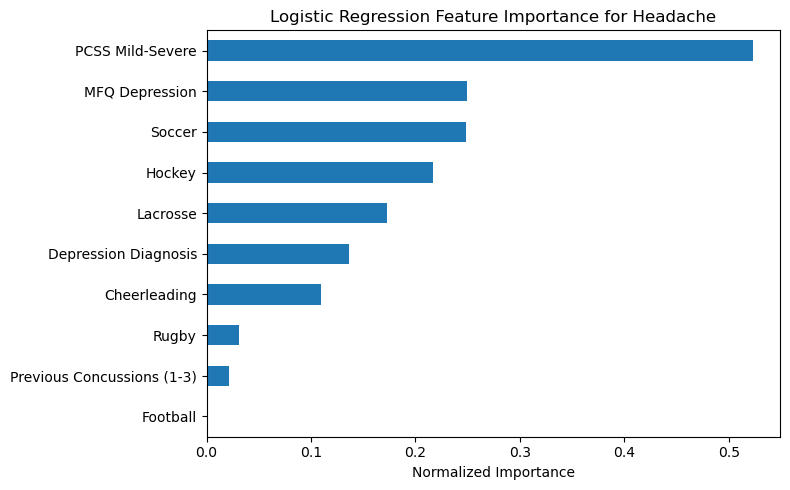

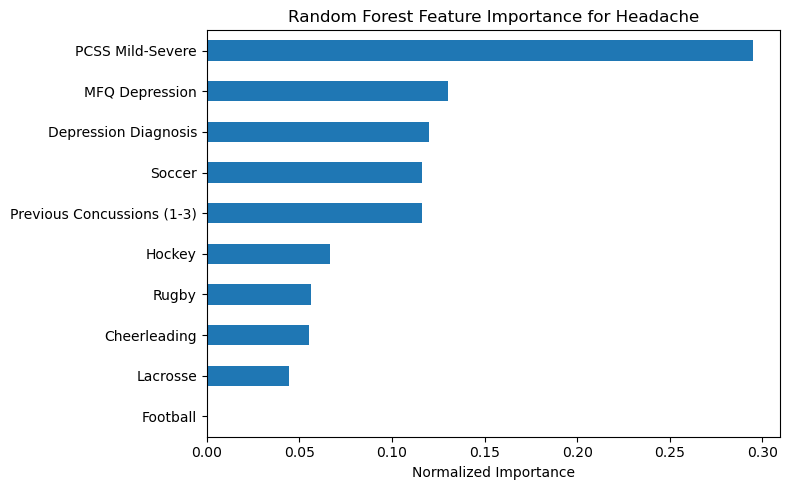

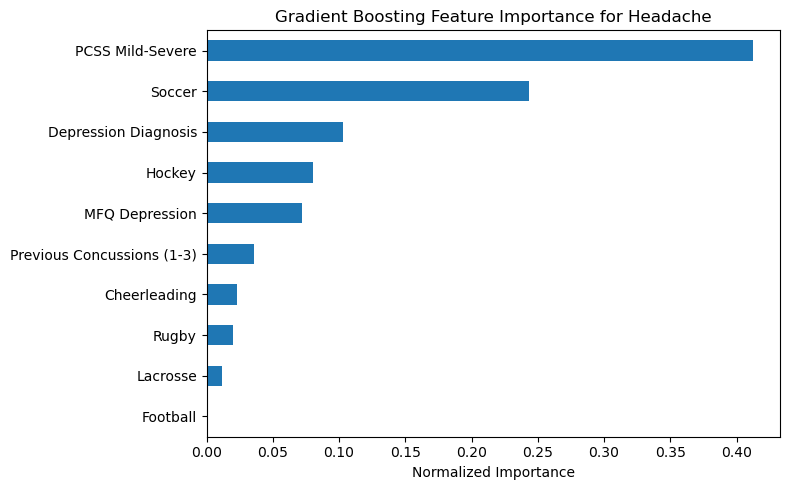

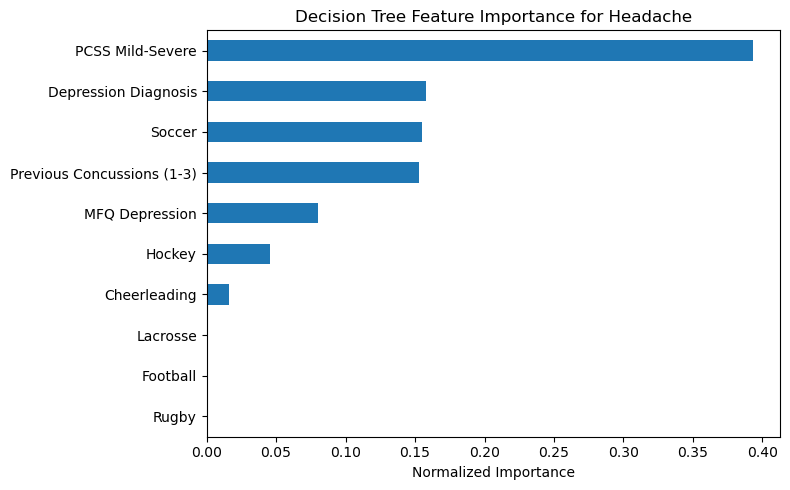

In [28]:
# Re-run clean feature importance plots for tuned Gradient Boosting, Decision Tree,
# Random Forest, and Logistic Regression for **Sadness** and **Headache** 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

df.columns = df.columns.str.strip()

# Define predictors
predictors = [
    'Previous Concussions (1-3)', 'Depression Diagnosis',
    'PCSS Mild-Severe', 'MFQ Depression',
    'Soccer', 'Hockey', 'Rugby', 'Football', 'Lacrosse', 'Cheerleading'
]

# Best tuned parameters from user results
best_params_dict = {
    "Sadness": {
        "Logistic Regression": {'C': 1},
        "Random Forest": {'n_estimators': 100, 'max_depth': None},
        "Gradient Boosting": {'n_estimators': 100, 'learning_rate': 0.05},
        "Decision Tree": {'max_depth': 10}
    },
    "Headache": {
        "Logistic Regression": {'C': 0.1},
        "Random Forest": {'n_estimators': 300, 'max_depth': None},
        "Gradient Boosting": {'n_estimators': 300, 'learning_rate': 0.05},
        "Decision Tree": {'max_depth': 5}
    }
}

# Clean instantiation function
def get_model_instance(name, params):
    if name == "Logistic Regression":
        return LogisticRegression(max_iter=500, solver='lbfgs', **params)
    elif name == "Random Forest":
        return RandomForestClassifier(**params)
    elif name == "Gradient Boosting":
        return GradientBoostingClassifier(**params)
    elif name == "Decision Tree":
        return DecisionTreeClassifier(**params)

# Function to get feature importances
def get_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_).flatten()
    else:
        importances = np.zeros(len(feature_names))
    return pd.Series(importances, index=feature_names, name=model_name).sort_values(ascending=True)

# Plot function
def plot_feature_importance_series(importance_series, label, model_name):
    plt.figure(figsize=(8, 5))
    importance_series.plot(kind='barh')
    plt.xlabel('Normalized Importance')
    plt.title(f'{model_name} Feature Importance for {label}')
    plt.tight_layout()
    plt.show()

# Selected models
selected_models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "Decision Tree"]

# Run and visualize for each target
for target_label, target_column in {"Sadness": "Sadness", "Headache": "Headache"}.items():
    X = df[predictors]
    y = df[target_column]
    
    for model_name in selected_models:
        params = best_params_dict[target_label][model_name]
        model = get_model_instance(model_name, params)
        model.fit(X, y)
        importance_series = get_feature_importance(model, model_name, X.columns)
        plot_feature_importance_series(importance_series, target_label, model_name)

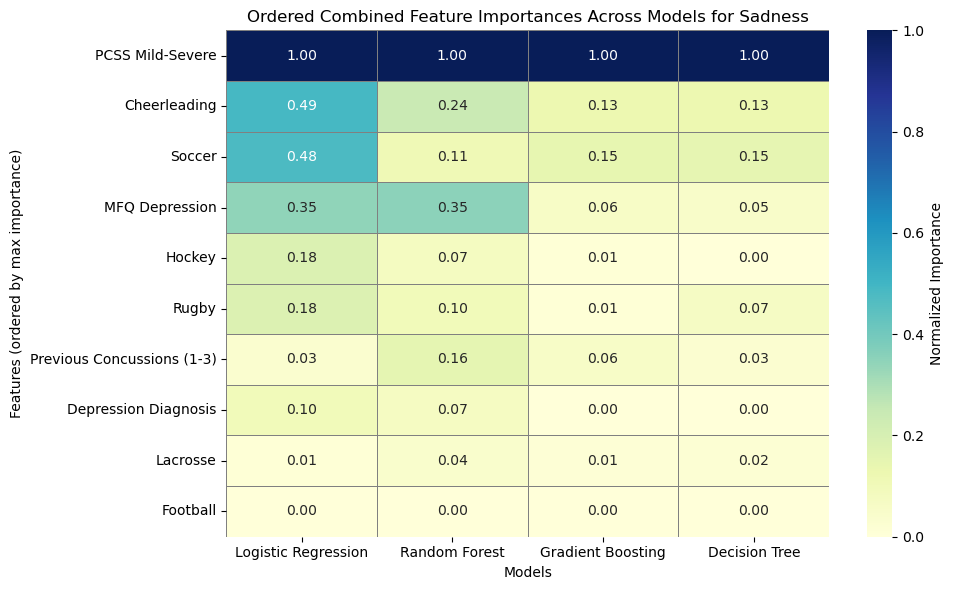

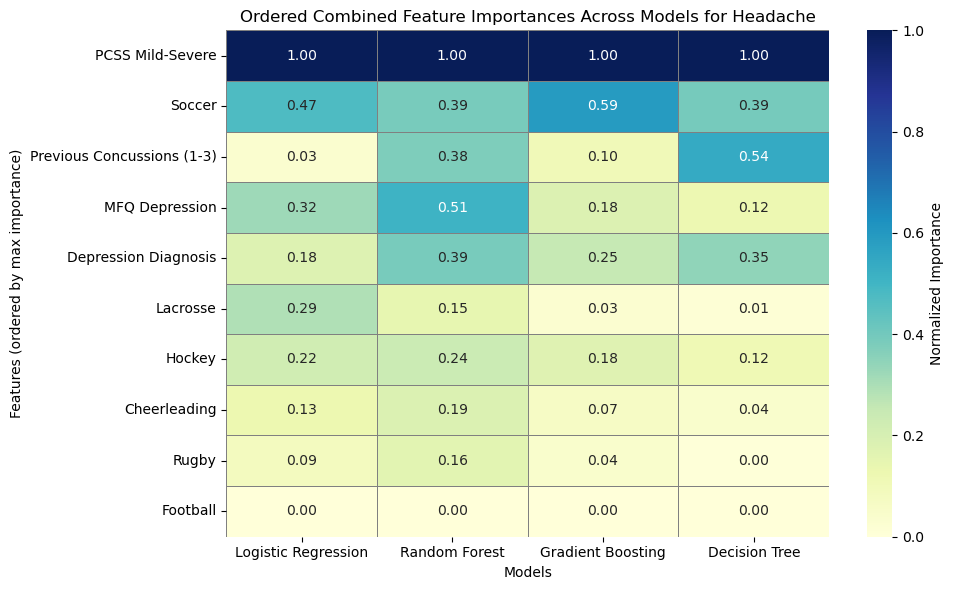

In [29]:
# Reorder the combined feature importance heatmaps in **descending order** of maximum importance across any model

# Function to reorder and plot
def plot_ordered_combined_importance_heatmap(importance_df, label):
    # Order by the maximum normalized importance across models (descending)
    importance_df_ordered = importance_df.loc[
        importance_df.max(axis=1).sort_values(ascending=False).index
    ]

    plt.figure(figsize=(10, 6))
    sns.heatmap(importance_df_ordered,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                linewidths=0.5,
                linecolor='gray',
                cbar_kws={'label': 'Normalized Importance'})
    plt.title(f"Ordered Combined Feature Importances Across Models for {label}")
    plt.ylabel("Features (ordered by max importance)")
    plt.xlabel("Models")
    plt.tight_layout()
    plt.show()

# Re-plot ordered heatmap for Sadness
plot_ordered_combined_importance_heatmap(importance_df_sadness, "Sadness")

# Re-plot ordered heatmap for Headache
plot_ordered_combined_importance_heatmap(importance_df_headache, "Headache")

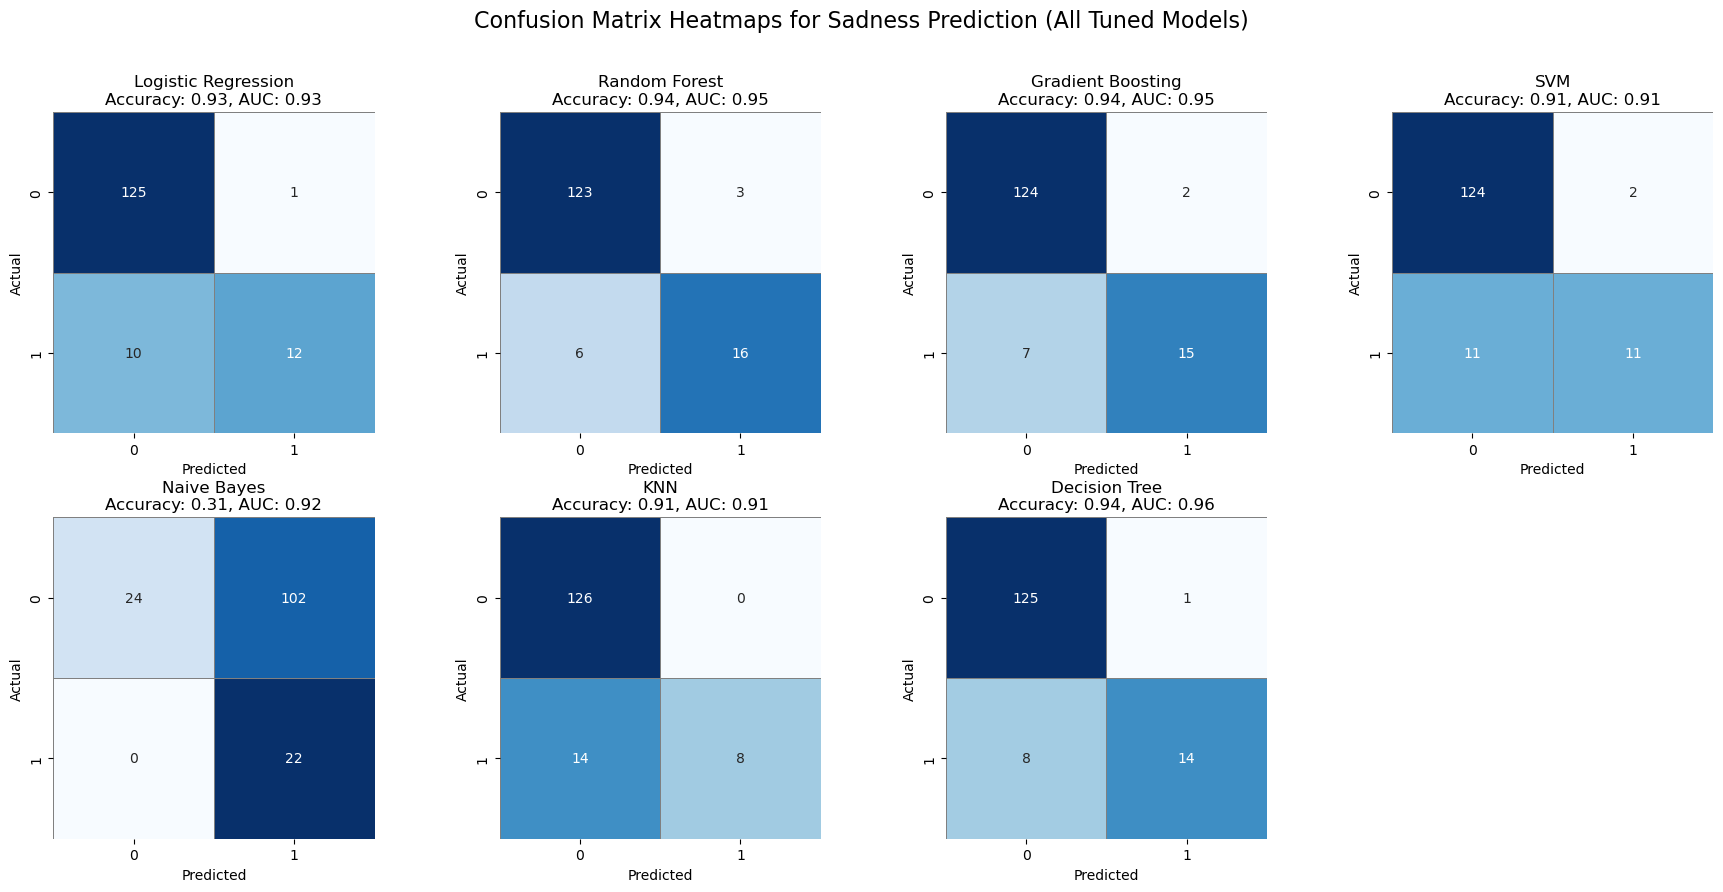

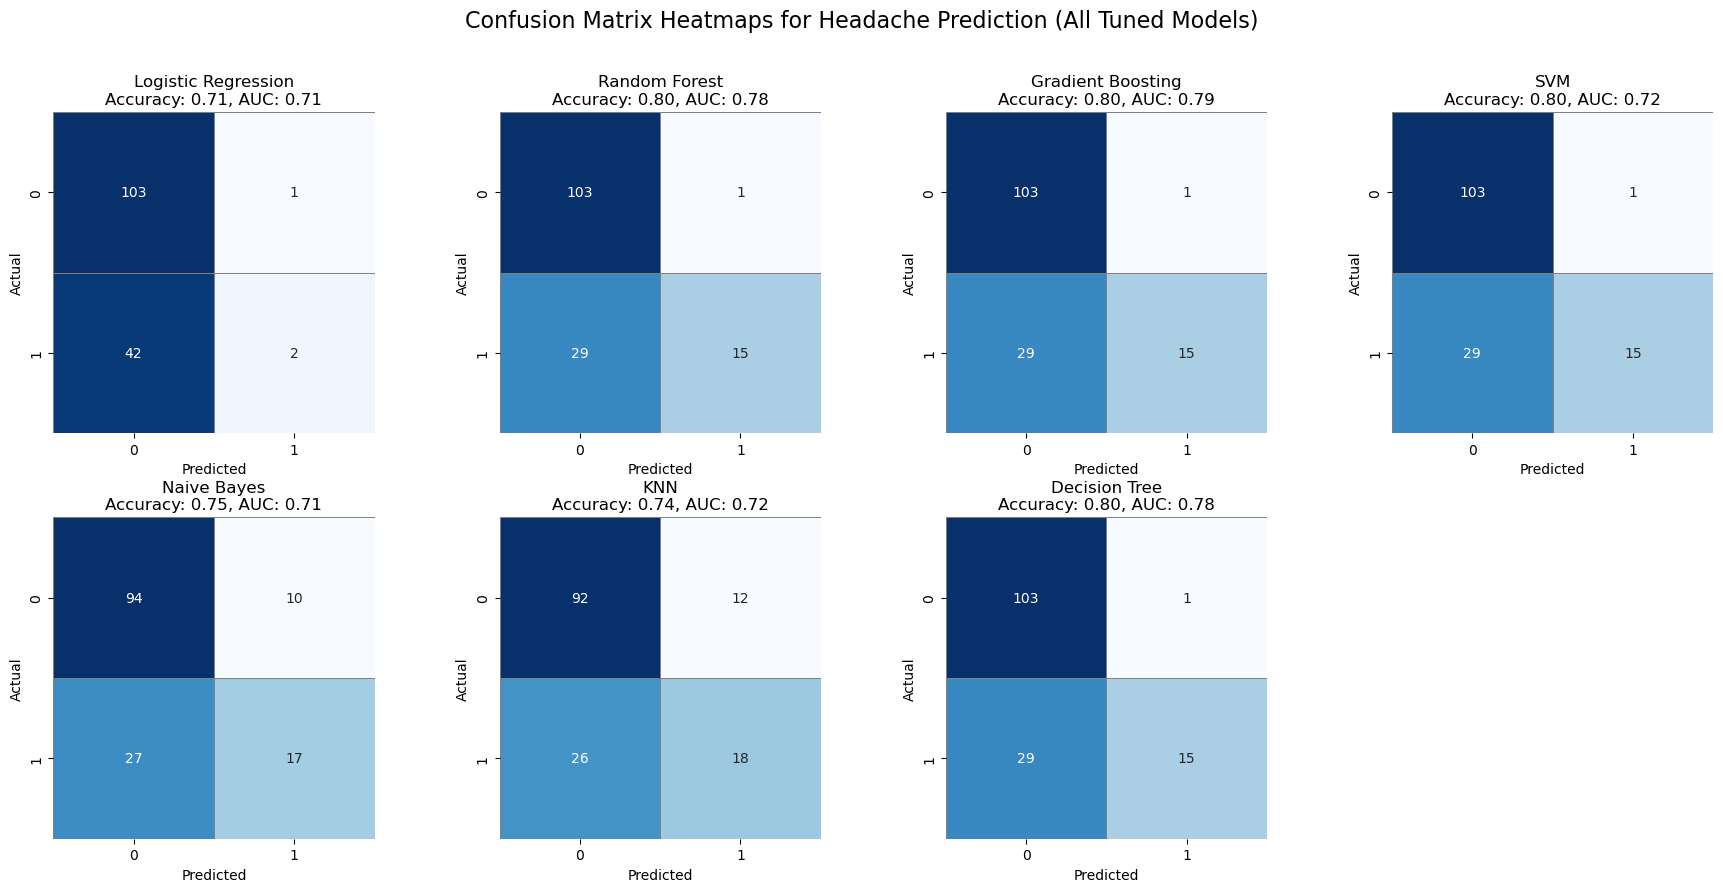

In [30]:
# Re-run clean confusion matrix heatmaps for all seven models for Sadness and Headache

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

df.columns = df.columns.str.strip()

# Define predictors
predictors = [
    'Previous Concussions (1-3)', 'Depression Diagnosis',
    'PCSS Mild-Severe', 'MFQ Depression',
    'Soccer', 'Hockey', 'Rugby', 'Football', 'Lacrosse', 'Cheerleading'
]

# Best tuned parameters from user results
best_params_dict = {
    "Sadness": {
        "Logistic Regression": {'C': 1},
        "Random Forest": {'n_estimators': 100, 'max_depth': None},
        "Gradient Boosting": {'n_estimators': 100, 'learning_rate': 0.05},
        "SVM": {'kernel': 'linear', 'C': 0.1},
        "Naive Bayes": {},
        "KNN": {'n_neighbors': 7},
        "Decision Tree": {'max_depth': 10}
    },
    "Headache": {
        "Logistic Regression": {'C': 0.1},
        "Random Forest": {'n_estimators': 300, 'max_depth': None},
        "Gradient Boosting": {'n_estimators': 300, 'learning_rate': 0.05},
        "SVM": {'kernel': 'rbf', 'C': 10},
        "Naive Bayes": {},
        "KNN": {'n_neighbors': 7},
        "Decision Tree": {'max_depth': 5}
    }
}

# Clean instantiation function
def get_model_instance(name, params):
    if name == "Logistic Regression":
        return LogisticRegression(max_iter=500, solver='lbfgs', **params)
    elif name == "Random Forest":
        return RandomForestClassifier(**params)
    elif name == "Gradient Boosting":
        return GradientBoostingClassifier(**params)
    elif name == "SVM":
        return SVC(probability=True, **params)
    elif name == "Naive Bayes":
        return GaussianNB(**params)
    elif name == "KNN":
        return KNeighborsClassifier(**params)
    elif name == "Decision Tree":
        return DecisionTreeClassifier(**params)

# Full model list for grid comparison
full_model_list = [
    "Logistic Regression", "Random Forest", "Gradient Boosting", "SVM",
    "Naive Bayes", "KNN", "Decision Tree"
]

# Function to generate confusion matrix heatmaps
def plot_confusion_matrices_grid(target_label, target_column):
    X = df[predictors]
    y = df[target_column]

    fig, axes = plt.subplots(2, 4, figsize=(18, 9))
    axes = axes.flatten()

    for idx, model_name in enumerate(full_model_list):
        if idx >= len(axes):
            break
        params = best_params_dict[target_label].get(model_name, {})
        model = get_model_instance(model_name, params)
        model.fit(X, y)
        y_pred = model.predict(X)
        cm = confusion_matrix(y, y_pred)
        cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

        sns.heatmap(cm_norm,
                    annot=cm,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[idx],
                    square=True,
                    linewidths=0.5,
                    linecolor='gray')
        acc = accuracy_score(y, y_pred)
        auc_val = roc_auc_score(y, model.predict_proba(X)[:, 1])

        axes[idx].set_title(f"{model_name}\nAccuracy: {acc:.2f}, AUC: {auc_val:.2f}")
        axes[idx].set_xlabel("Predicted")
        axes[idx].set_ylabel("Actual")

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"Confusion Matrix Heatmaps for {target_label} Prediction (All Tuned Models)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Generate confusion matrix heatmaps for Sadness
plot_confusion_matrices_grid("Sadness", "Sadness")

# Generate confusion matrix heatmaps for Headache
plot_confusion_matrices_grid("Headache", "Headache")
